In [1]:
# Notebook um Depressionen von Studeten vorherzusagen

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [13]:
# Datensatz wird geladen
df = pd.read_parquet("../data/student_depression_cleaned.parquet")


In [19]:
#Target ist die Depression
target = "Depression"
features = ["Gender", "Age", "Academic Pressure", "Work Pressure", "Study Satisfaction", "Job Satisfaction", "Work/Study Hours", "Financial Stress", "Total Pressure"]
X = df[features]
y = df[target]

In [20]:
X = pd.get_dummies(X, drop_first=True)  # One-Hot-Encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% Training 20% Test

In [21]:
# Werte Standartisieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [22]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]


Logistische Regression Evaluation
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      2343
           1       0.80      0.84      0.82      3238

    accuracy                           0.78      5581
   macro avg       0.78      0.77      0.78      5581
weighted avg       0.78      0.78      0.78      5581

ROC-AUC: 0.855959375396256


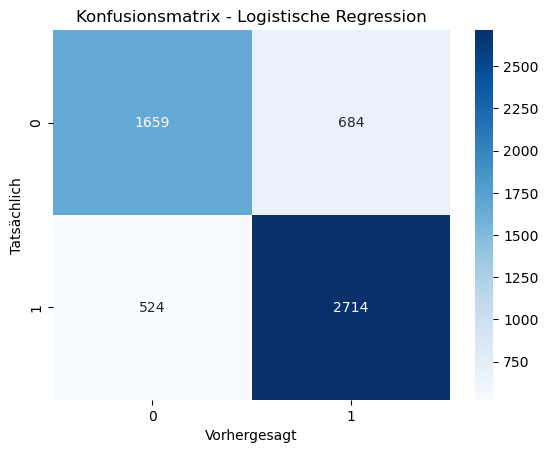

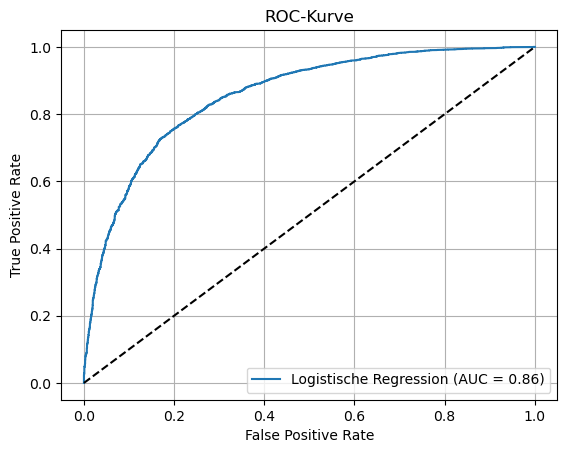

In [23]:
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n{name} Evaluation")
    print(classification_report(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    # Konfusionsmatrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Konfusionsmatrix - {name}")
    plt.xlabel("Vorhergesagt")
    plt.ylabel("Tatsächlich")
    plt.show()

    # ROC-Kurve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_true, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-Kurve")
    plt.legend()
    plt.grid()
    plt.show()

evaluate_model("Logistische Regression", y_test, y_pred_logreg, y_proba_logreg)